<a href="https://colab.research.google.com/github/Marouane-Elgoumiri/ds_module_project/blob/main/project_data_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Bienvenue dans Colab !</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Nouveau&#41; Essayez l'API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Si vous connaissez déjà Colab, regardez cette vidéo pour découvrir les tables interactives, l'affichage de l'historique du code exécuté et la palette de commandes.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  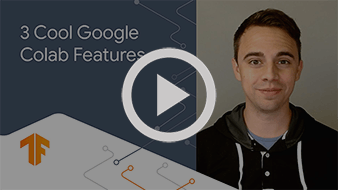
  </a>
</center>

In [61]:
!pip install googletrans==4.0.0-rc1
!pip install nltk scikit-learn pandas

In [62]:
import pandas as pd
import pandas as pd
import requests
from bs4 import BeautifulSoup
from googletrans import Translator
from tqdm import tqdm

In [63]:
def scrape_articles(category_info):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    articles_info = []
    for title, url in tqdm(category_info, desc="Scraping categories"):
        cat_response = requests.get(url, headers=headers)
        cat_response.raise_for_status()
        cat_response.encoding = 'utf-8'

        cat_soup = BeautifulSoup(cat_response.text, 'html.parser')
        articles = cat_soup.find_all('div', class_='col-12 col-sm-6 col-md-6 col-xl-4')

        for article in articles:
            article_link = article.find('a', class_='stretched-link')
            if article_link and 'title' in article_link.attrs:
                articles_info.append((title, article_link['title'], article_link['href']))

    with open('articles_for_category.txt', 'w', encoding='utf-8') as f:
        for category_title, article_title, article_url in tqdm(articles_info, desc="Writing articles"):
            f.write(f"Category: {category_title}, Article Title: {article_title}, URL: {article_url}\n")


category_info = [("sport", "https://www.hespress.com/sport"), ("economie", "https://www.hespress.com/economie")]
scrape_articles(category_info)


df = pd.read_csv('articles_for_category.txt', skiprows=2, names=['Category', 'Article Title', 'URL'], delimiter=',', encoding='utf-8', converters={'URL': lambda x: x.split('URL: ')[-1].strip()})

# Enregistrer le DataFrame en tant que fichier CSV
df.to_csv('articles_for_category.csv', index=False)




Writing articles: 100%|██████████| 24/24 [00:00<00:00, 48141.22it/s]


In [64]:
print(df)

              Category                                      Article Title  \
0      Category: sport   Article Title: إحصائيات اللاعب حريمات تثير ال...   
1      Category: sport   Article Title: جيدو المغرب يشارك في بطولة العالم   
2      Category: sport    Article Title: غوميز: الزمالك يستحق "كأس الكاف"   
3      Category: sport   Article Title: بولديني مطلوب في الدوري البرتغالي   
4      Category: sport   Article Title: دياز يواصل  صناعة الأهداف مع ا...   
5      Category: sport   Article Title: مدرب نهضة بركان: هنيئا للزمالك...   
6      Category: sport   Article Title: شديرة يسعد جمهور نادي "فروزينوني"   
7      Category: sport   Article Title: البقالي يتألق في "ملتقى محمد ا...   
8      Category: sport   Article Title: الزمالك المصري يفوز على نهضة ب...   
9      Category: sport   Article Title: "سيتي" يحتفظ بلقب الدوري الإنج...   
10  Category: economie   Article Title: النقل الجوي يزيد بـ30% في المملكة   
11  Category: economie   Article Title: صندوق الإيداع والتدبير يسند ال...   

In [65]:
def scrape_comments_from_csv(csv_file, comment_class):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

    # Charger le fichier CSV
    df = pd.read_csv(csv_file)  # Commencer à lire à partir de la ligne 2

    comments_info = []
    for index, row in df.iterrows():
        article_url = row['URL']
        article_title = row['Article Title']

        response = requests.get(article_url, headers=headers)
        response.raise_for_status()
        response.encoding = 'utf-8'

        soup = BeautifulSoup(response.text, 'html.parser')
        comments = soup.find_all('div', class_=comment_class)

        for comment in comments:
            comment_text = comment.get_text(strip=True)
            comments_info.append((article_title, comment_text))

    # Créer un DataFrame à partir des informations des commentaires
    comments_df = pd.DataFrame(comments_info, columns=['Article Title', 'Comment'])

    return comments_df

# Exemple d'utilisation
comments_df = scrape_comments_from_csv('/content/articles_for_category.csv', 'comment-text')

# Enregistrer les commentaires en tant que fichier CSV
comments_df.to_csv('comments_for_articles.csv', index=False)


In [66]:
def translate_comments(data):
    if not data.empty:
        translator = Translator(service_urls=['translate.google.com'])
        translated_comments = []
        for text in data['Comment']:
            try:
                translated_text = translator.translate(text, dest='en').text
                translated_comments.append(translated_text)
            except Exception as e:
                print(f"Error translating comment: {text}. Error: {e}")
                translated_comments.append(None)

        translated_data = pd.DataFrame(translated_comments, columns=['Comment_en'])
        print("Comments translated successfully.")
        print(translated_data)
        translated_data.to_csv('comments_english.csv', index=False)
    else:
        print("No data available to translate.")

translate_comments(comments_df)


Comments translated successfully.
                                            Comment_en
0    Haremat his place in the national team without...
1    He has to join the Kaabi, Greece, to achieve t...
2    We are waiting for his brilliance with his tea...
3    Frankly, the truth is, especially the harems o...
4    Frankness Blasto is guaranteed with the Olympi...
..                                                 ...
338  What is the benefit of importing and the state...
339  A sheep buy it at 1100 dirhams and supports ea...
340  The sheep costs 100 euros and Moroccan State s...
341  The strategy of the wise Moroccan state, we wa...
342  All that concerns them is to fatten their bank...

[343 rows x 1 columns]


In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy as nltk_accuracy
# importing the data
data = pd.read_csv('comments_english.csv')


nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

#Running the function:
data['Comment_en'] = data['Comment_en'].fillna('').astype(str)

data['processed_comments'] = data['Comment_en'].apply(preprocess_text)

data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment_en,processed_comments
0,Haremat his place in the national team without...,haremat place national team without emotion be...
1,"He has to join the Kaabi, Greece, to achieve t...",join kaabi greece achieve globalization morocc...
2,We are waiting for his brilliance with his tea...,waiting brilliance team rest national teams co...
3,"Frankly, the truth is, especially the harems o...",frankly truth especially harems big player age
4,Frankness Blasto is guaranteed with the Olympi...,frankness blasto guaranteed olympic team alo a...
5,The national championship is like the neighbor...,national championship like neighborhoods ramad...
6,Haremat has a personal problem and a dispute w...,haremat personal problem dispute walid since l...
7,Whoever watched the match from the first and t...,whoever watched match first way played volcani...
8,Zamalek deserves the cup by defrauding and los...,zamalek deserves cup defrauding losing time se...
9,The renaissance of Berkane was not at the requ...,renaissance berkane required level lacking eff...


In [68]:
pip install vaderSentiment

In [69]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data = pd.read_csv('comments_english.csv')
data['Comment_en'] = data['Comment_en'].fillna('').astype(str)
data['processed_comments'] = data['Comment_en'].apply(preprocess_text)

def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['processed_comments'].apply(analyze_sentiment)

data.head(10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment_en,processed_comments,sentiment
0,Haremat his place in the national team without...,haremat place national team without emotion be...,positive
1,"He has to join the Kaabi, Greece, to achieve t...",join kaabi greece achieve globalization morocc...,positive
2,We are waiting for his brilliance with his tea...,waiting brilliance team rest national teams co...,positive
3,"Frankly, the truth is, especially the harems o...",frankly truth especially harems big player age,positive
4,Frankness Blasto is guaranteed with the Olympi...,frankness blasto guaranteed olympic team alo a...,neutral
5,The national championship is like the neighbor...,national championship like neighborhoods ramad...,positive
6,Haremat has a personal problem and a dispute w...,haremat personal problem dispute walid since l...,negative
7,Whoever watched the match from the first and t...,whoever watched match first way played volcani...,positive
8,Zamalek deserves the cup by defrauding and los...,zamalek deserves cup defrauding losing time se...,negative
9,The renaissance of Berkane was not at the requ...,renaissance berkane required level lacking eff...,negative


In [70]:
pip install matplotlib seaborn


<ipython-input-71-91756b5b6cd4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


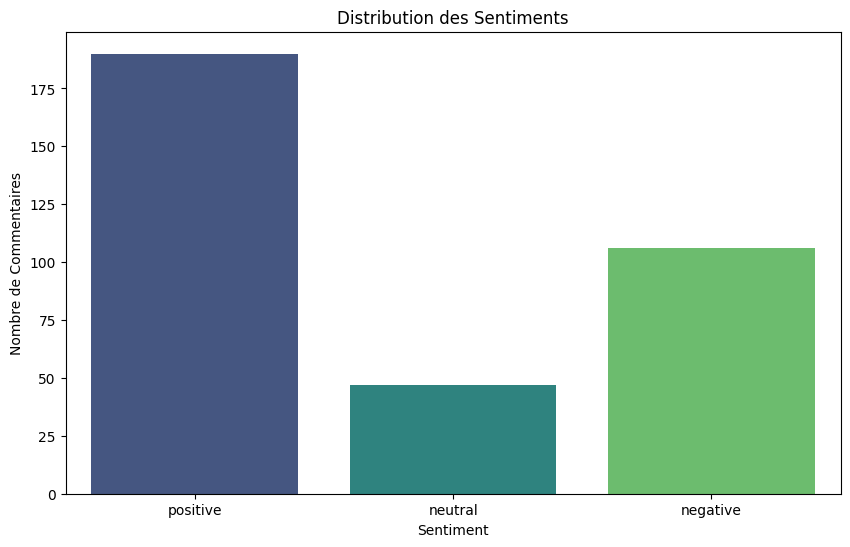

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('comments_english.csv')
data['Comment_en'] = data['Comment_en'].fillna('').astype(str)
data['processed_comments'] = data['Comment_en'].apply(preprocess_text)
data['sentiment'] = data['processed_comments'].apply(analyze_sentiment)

# Visualiser la distribution des sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Distribution des Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de Commentaires')
plt.show()

In [74]:
#vectorize the text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_comments'])
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [76]:
#evaluate the model
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5072463768115942
Classification Report:
               precision    recall  f1-score   support

    negative       0.48      0.45      0.47        22
     neutral       0.08      0.12      0.10         8
    positive       0.69      0.62      0.65        39

    accuracy                           0.51        69
   macro avg       0.41      0.40      0.40        69
weighted avg       0.55      0.51      0.53        69



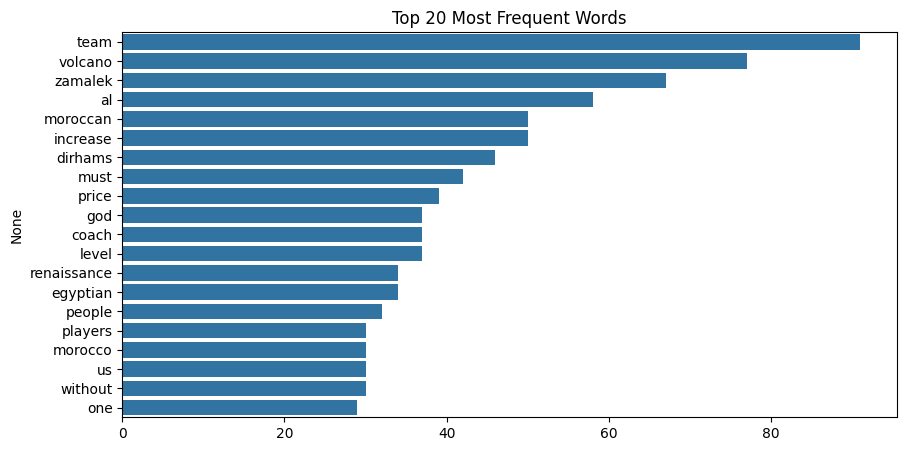

In [80]:
# Most frequent words
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_freq = word_freq.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq.values, y=word_freq.index)
plt.title('Top 20 Most Frequent Words')
plt.show()
